In [229]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')

In [230]:
import pandas as pd
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import matplotlib.pyplot as plt
import numpy as np

In [231]:
import datetime as dt

In [232]:
import sqlalchemy
from sqlalchemy import create_engine, func, inspect
import os

In [233]:
# Create engine
engine = create_engine(f"sqlite:///{os.getcwd()}/hawaii.sqlite")


In [234]:
# Reflect an existing database into a new model
Base = automap_base()


In [235]:
# Reflect the tables

Base.prepare(engine, reflect = True)

In [236]:
# Save references to the table

Measurement = Base.classes.measurement
Station = Base.classes.station

In [237]:
# Create our session from Python to our DB

session = Session(bind = engine)

In [238]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").all()



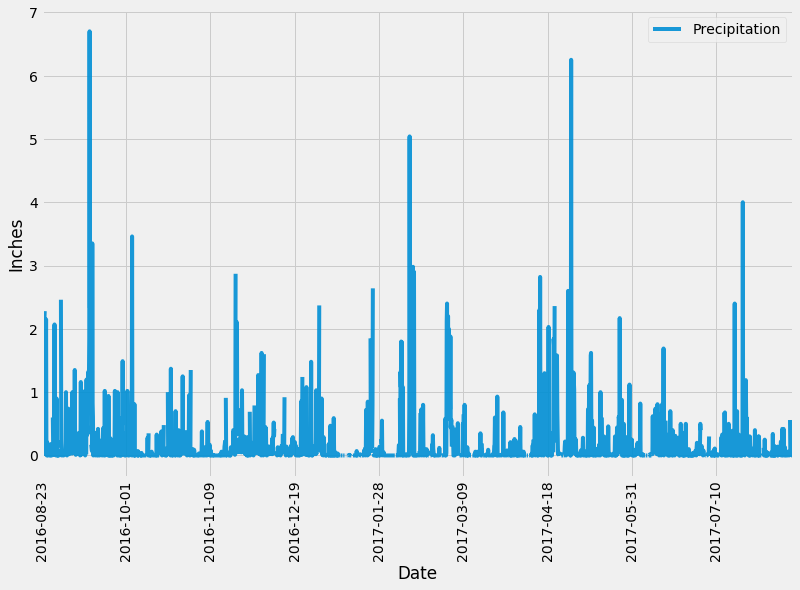

In [239]:
# Save the results as a Pandas Dataframe and set the index to the date

df = pd.DataFrame(results, columns = ["Date", "Precipitation"])
df.set_index("Date", inplace = True)
df.sort_index(inplace = True)
df.plot(figsize = (12,8), alpha = 0.9, rot = 90)
plt.ylabel("Inches")
plt.show()


In [240]:
# Use Pandas to calculate the summary statistics for the precipitation data

df["Precipitation"].describe()


count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

In [241]:
# Design a query to show how many stations are available in this dataset

stations_count = session.query(Station.name).count()

stations_count

9

In [247]:
# What are the most active stations? (i.e  what stations have the most rows)
# List the stations and the counts in descending order

list_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

for record in list_stations:
    (station_id, count) = record
    print(f"{station_id} has {count} rows.")

list_stations    

USC00519281 has 2772 rows.
USC00519397 has 2724 rows.
USC00513117 has 2709 rows.
USC00519523 has 2669 rows.
USC00516128 has 2612 rows.
USC00514830 has 2202 rows.
USC00511918 has 1979 rows.
USC00517948 has 1372 rows.
USC00518838 has 511 rows.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [243]:
# Using the station id from the previous query 
# Calculate the lowest temp, highest temp 
# Calculate ave temp of the most active station

stats = session.query(Measurement.station, func.max(Measurement.tobs), 
                      func.min(Measurement.tobs), func.avg(Measurement.tobs)).\
                    filter_by(station = "USC00519281")

for rec in stats:
    (station, max_temp, min_temp, avg_temp) = rec
    print(f"Station {station} has the highest temperature at {max_temp}, lowest temperature at {min_temp} and average temperature at {avg_temp:.4}.")
    
    
   

Station USC00519281 has the highest temperature at 85.0, lowest temperature at 54.0 and average temperature at 71.66.


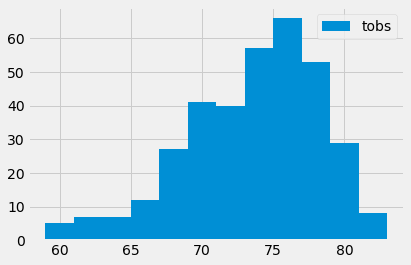

In [175]:
# Choose the station with the highest number of temp observations
# Query the last 12 months of temp observations data for this station

temp_data = session.query(Measurement.tobs).filter(Measurement.date >= "2016-08-23").filter(Measurement.station == "USC00519281")

df = pd.DataFrame(temp_data, columns = ["tobs"])

plt.hist(df["tobs"],bins = 12)
plt.legend(["tobs"])
plt.show()

